# マルチンゲール性を考慮しない多期間モデル

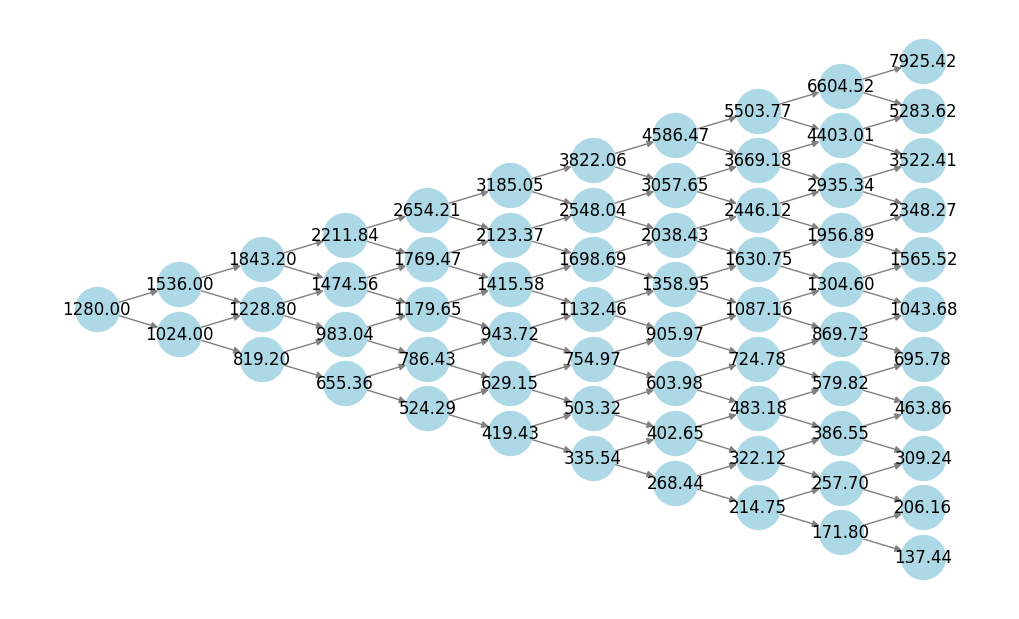

In [16]:

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def binomial_tree(S0, u, d, n):
    tree = {}
    for i in range(n + 1):
        for j in range(i + 1):
            tree[(i, j)] = S0 * (u ** j) * (d ** (i - j))
    return tree

def plot_binomial_tree(tree):
    G = nx.DiGraph()
    pos = {}
    labels = {}
    
    for (i, j), S in tree.items():
        G.add_node((i, j))
        pos[(i, j)] = (i, j - i/2)  # 整列のための位置調整
        labels[(i, j)] = f'{S:.2f}'
    
    for (i, j) in tree:
        if i < max(k[0] for k in tree):
            G.add_edge((i, j), (i + 1, j))
            G.add_edge((i, j), (i + 1, j + 1))
    
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', edge_color='gray')
    plt.show()

# 初期価格、アップファクター、ダウンファクター、期間
S0 = 1280
u = 1.2
d = 0.8
n = 10

tree = binomial_tree(S0, u, d, n)
plot_binomial_tree(tree)


このコードでは、2項モデルの価格ツリーを生成し、NetworkX を用いて可視化しています。

- binomial_tree() 関数で、各ノードの価格を計算
- plot_binomial_tree() 関数で、ツリーを描画
  
このコードを実行すると、2項モデルのツリーが表示され、価格の推移が視覚的に確認できます。

マルチンゲール性を考慮していなくても、ある価格からアップしてダウンしたものと、ダウンしてからアップしたものは同じノードに収束する

# 二項モデルの価格計算

二項モデルでは、時間ステップ 
$
𝑡
$
における株価は、初期株価 
$
S0
$
​
  に アップファクター 
$
u
$
（上昇率）とダウンファクター 
$
d
$
（下降率）を掛けたもの で決まります。

もし 
$n$ 期間後に 1回上昇し、1回下降 した場合の価格を考えると、

$
𝑆=𝑆0 × 𝑢 × 𝑑
$
になります。

一方で、1回下降し、1回上昇 した場合の価格は、
$
𝑆=𝑆0 × 𝑑 × 𝑢
$
​
となります。

# なぜ同じ価格になるのか

ここで、掛け算の順序は数学的に交換可能（可換）なので、成立し、両者は同じ価格に収束します。

これが、"アップしてからダウン" した場合と "ダウンしてからアップ" した場合が 同じ価格になる理由 です。

